<div align="center">
  <img src="https://github.com/open-mmlab/mmyolo/raw/main/resources/mmyolo-logo.png" width="600"/>
  <div>&nbsp;</div>
  <div align="center">
    <b><font size="5">MMYOLO 官方仓库</font></b>
    <sup>
      <a href="https://github.com/open-mmlab/mmyolo">
        <i><font size="4">⭐Star</font></i>
      </a>
    </sup>
    &nbsp;&nbsp;&nbsp;&nbsp;
    <b><font size="5">MMYOLO 开发计划</font></b>
    <sup>
      <a href="https://github.com/open-mmlab/mmyolo/issues/136">
        <i><font size="4">💬欢迎留言</font></i>
      </a>
    </sup>
    &nbsp;&nbsp;&nbsp;&nbsp;
    <b><font size="5">玩转 MMYOLO 系列视频教程</font></b>
    <sup>
      <a href="https://space.bilibili.com/1293512903/channel/collectiondetail?sid=788924">
        <i><font size="4">👍一键三连</font></i>
      </a>
    </sup>
    </br>
    <font size="3">MMYOLO 定位为 YOLO 系列工业核心算法库，提供统一全面的评测流程，轻松可定制的模块组件和支持多任务且高效的训练部署流程。</font>
  </div>
  <div>&nbsp;</div>

<a href="https://colab.research.google.com/github/open-mmlab/OpenMMLabCourse/blob/main/codes/MMYOLO_tutorials/[工具类第二期]10分钟轻松掌握大图推理.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

[![PyPI](https://img.shields.io/pypi/v/mmyolo)](https://pypi.org/project/mmyolo)
[![docs](https://img.shields.io/badge/docs-latest-blue)](https://mmyolo.readthedocs.io/en/latest/)
[![deploy](https://github.com/open-mmlab/mmyolo/workflows/deploy/badge.svg)](https://github.com/open-mmlab/mmyolo/actions)
[![codecov](https://codecov.io/gh/open-mmlab/mmyolo/branch/master/graph/badge.svg)](https://codecov.io/gh/open-mmlab/mmyolo)
[![license](https://img.shields.io/github/license/open-mmlab/mmyolo.svg)](https://github.com/open-mmlab/mmyolo/blob/master/LICENSE)
[![open issues](https://isitmaintained.com/badge/open/open-mmlab/mmyolo.svg)](https://github.com/open-mmlab/mmyolo/issues)
[![issue resolution](https://isitmaintained.com/badge/resolution/open-mmlab/mmyolo.svg)](https://github.com/open-mmlab/mmyolo/issues)

[📘文档](https://mmyolo.readthedocs.io/zh_CN/latest/) |
[🛠️安装教程](https://mmyolo.readthedocs.io/zh_CN/latest/install.html) |
[👀模型库](https://mmyolo.readthedocs.io/zh_CN/latest/model_zoo.html) |
[🆕更新日志](https://mmyolo.readthedocs.io/zh_CN/latest/notes/changelog.html) |
[🤔反馈问题](https://github.com/open-mmlab/mmyolo/issues/new/choose)

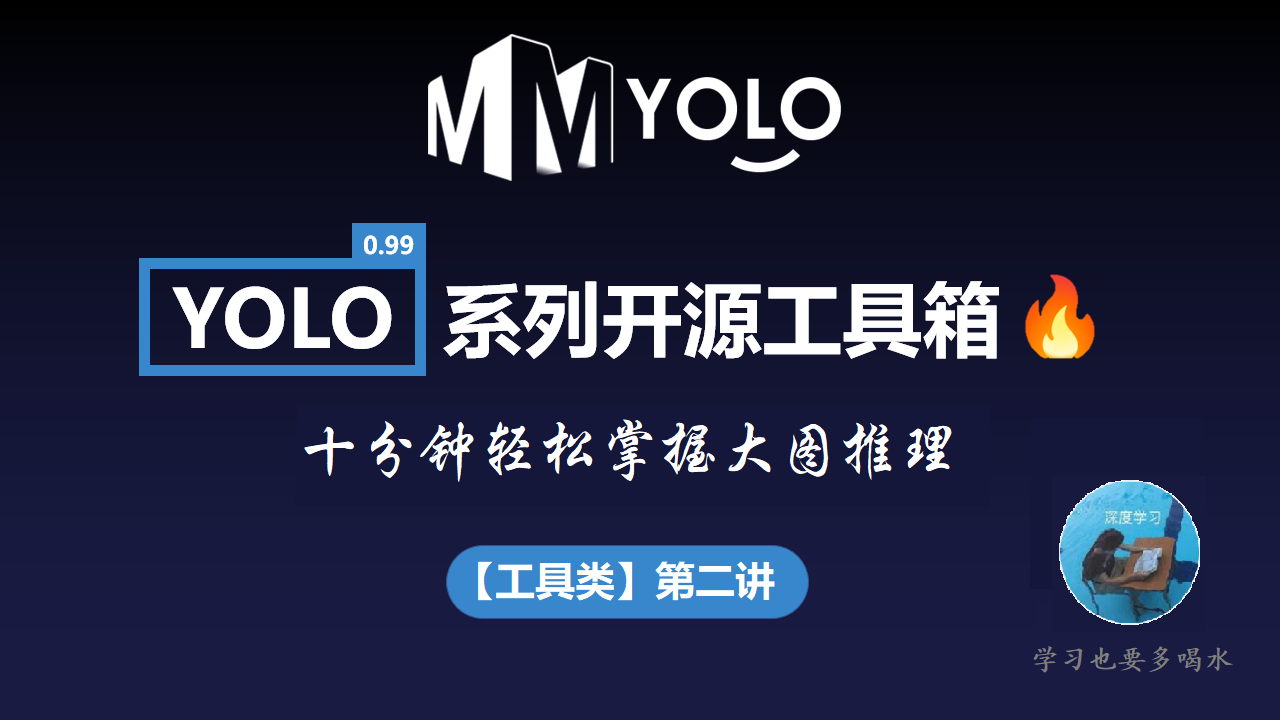

**系列视频回顾：**：
- 玩转 MMYOLO 工具类第一期： 特征图可视化 https://zhuanlan.zhihu.com/p/578141381
- 玩转 MMYOLO 基础类第一期： 配置文件太复杂？继承用法看不懂？配置全解读来了 https://zhuanlan.zhihu.com/p/577715188
- 玩转 MMYOLO 基础类第二期：工程文件结构解读 https://zhuanlan.zhihu.com/p/584807195
- 玩转 MMYOLO 实用类第一期：OpenMMLab 2.0 源码阅读和调试「必备」技巧 https://zhuanlan.zhihu.com/p/580885852
- 玩转 MMYOLO 实用类第二期：10分钟带你换遍主干网络 https://zhuanlan.zhihu.com/p/585641598

# 10 分钟轻松掌握大图推理

<div align="center"> 
<img src="https://picx.zhimg.com/v2-f9965101f858c117f46ad7275dedebcb_1440w.jpg?source=172ae18b"  alt="EfficientRep Backbone 结构图]">
</div>


- 你有没有对小目标的检测和对大图推理的需求呢？
- 有没有一种方法，检测这些较小目标不需要重新训练模型，也没有高GPU显存需求呢？
- 这种方法有哪些优点缺点注意事项呢？

<font size=5>🔥本期带你 10 分钟轻松掌握大图推理。🔥</font>



<mark>**大图推理采用第三方 sahi 库实现，并且 MMYOLO 中大图推理功能实现来自 sahi 官方热情贡献，再次感谢！！！**</mark>

## 0 环境准备

In [ ]:
#@title ### 0.1 检查环境版本
# 检查 python 版本
!python -V

# 检查 nvcc 版本
!nvcc -V

# 检查 GCC 版本
!gcc --version

# 检查 PyTorch 版本
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

In [ ]:
#@title ### 0.2 安装 MMYOLO
# 使用 mim 安装 OpenMMlab 系列依赖包
%pip install -U openmim
%pip show openmim
!mim install "mmengine==0.3.1"
!mim install "mmcv>=2.0.0rc2"
!mim install "mmdet>=3.0.0rc2"
# 下载 MMYOLO 仓库
# 目前采用的是 dev 分支，后续发 0.2.0 版本后会自直接合入 master 分支
!git clone https://github.com/open-mmlab/mmyolo.git -b dev
%cd mmyolo 
# 使用 mim 以编辑模式安装 MMYOLO
!mim install -v -e .

In [ ]:
# 查看安装结果
!mim list

In [ ]:
#@title ### 0.3 安装sahi官方库

!pip install -U sahi

In [ ]:
#@title ### 0.4 下载一个权重文件

!wget https://download.openmmlab.com/mmyolo/v0/yolov5/yolov5_s-v61_syncbn_fast_8xb16-300e_coco/yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth

## 1 SAHI：超大图片中对小目标检测的切片辅助超推理库

切片推理的概念基本上可以表示为：对原始图像的较小切片执行推理，然后合并原始图像上的切片预测。可以用下图表示：

<div align="center"> 
<img src="https://miro.medium.com/max/828/1*5VGHuTkeQlQVxELUAtwIfQ.gif"  alt="EfficientRep Backbone 结构图]">
</div>

如下图所示，通过执行切片推理，可以提高检测较小的对象时的精度。

<div align="center"> 
<img src="https://miro.medium.com/max/828/1*UUA_8fudFO4LWVapPzAa-Q.gif"  alt="EfficientRep Backbone 结构图]">
</div>

本节演示图例来自SAHI官方教程，详见：[here](https://medium.com/codable/sahi-a-vision-library-for-performing-sliced-inference-on-large-images-small-objects-c8b086af3b80)。


## 2 使用SAHI进行切片推理
现在,我们将展示一个在MMYOLO上的切片推理演示

### 2.1 用于推理演示的示例图像

选择dev分支下的 **demo/large_image.jpg**


In [ ]:
%cp demo/large_image.jpg /usr/local/share/jupyter/nbextensions/google.colab/large_image.jpg

In [ ]:
%%html
<img src= '/nbextensions/google.colab/large_image.jpg'/>

### 2.2 对示例图像进行全图直接推理

使用dev分支下的 **demo/image_demo.py** 以及刚刚下载好的权重文件进行推理

In [ ]:
!python demo/image_demo.py demo/large_image.jpg \
  configs/yolov5/yolov5_s-v61_syncbn_fast_8xb16-300e_coco.py \
  yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth

local loads checkpoint from path: yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth
/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '
[>>] 1/1, 0.2 task/s, elapsed: 7s, ETA:     0s
Results have been saved at /content/mmyolo/output


In [ ]:
%cp output/large_image.jpg /usr/local/share/jupyter/nbextensions/google.colab/large_image_1.jpg

In [ ]:
%%html
<img src= '/nbextensions/google.colab/large_image_1.jpg'/>

### 2.3 使用SAHI进行切片处理并进行推理

使用dev分支下的 **demo/large_image_demo.py** 以及刚刚下载好的权重文件进行推理


In [ ]:
!python demo/large_image_demo.py demo/large_image.jpg \
  configs/yolov5/yolov5_s-v61_syncbn_fast_8xb16-300e_coco.py \
  yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth

local loads checkpoint from path: yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth
/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '
Performing inference on 1 images... This may take a while.
[>>] 1/1, 0.5 task/s, elapsed: 2s, ETA:     0s
Results have been saved at /content/mmyolo/output


In [ ]:
%cp output/large_image.jpg /usr/local/share/jupyter/nbextensions/google.colab/large_image_2.jpg

In [ ]:
%%html
<img src= '/nbextensions/google.colab/large_image_2.jpg'/>

## 3 由推理结果引起的反思

<mark>**效果明显更好，但是发现一个小问题，有两辆车有重叠框，为何会出现重叠框？ 难道是合并阈值不对？**</mark>

**large_image_demo.py**的几个重要参数配置


In [1]:
'--out-dir'       ##推理结果输出文件夹路径

'--score-thr'      ## Bbox评分阈值

'--patch-size'      ## patch的大小

'--patch-overlap-ratio'  ##两个patch之间的重叠率

'--merge-iou-thr'     ##用于合并结果的IoU阈值 越小越容易合并

'--merge-nms-type'    ##用于合并结果的NMS类型，目前支持 nms 和 soft_nms 两种参数

'--debug'       ##在每个阶段导出1个输入的调试图像

'--debug'

### 3.1 分析问题原因

- [ ] **猜测是合并预测不合理**

试图调小 *--merge-iou-thr* ，让更多的框被合并，发现不管用

- [ ] **猜测是正好切到了物体边界**

试图修改重叠比例  *--patch-overlap-ratio* , 让图片重叠度更高，发现不管用

- [x] **尝试通过 *--debug* 可视化切片结果**


开启**large_image_demo.py**的debug模式

> --debug

In [ ]:
!python demo/large_image_demo.py demo/large_image.jpg \
  configs/yolov5/yolov5_s-v61_syncbn_fast_8xb16-300e_coco.py \
  yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth --debug

local loads checkpoint from path: yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth
/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '
Performing inference on 1 images... This may take a while.
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:709: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  ' the drawn bbox may not be in the image', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:779: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  ' the drawn polygon may not be in the image', UserWarning)
[>>] 1/1, 0.4 task/s, elapsed: 3s, ETA:     0s
Results have been saved at /conte

**问题所在：**

发现确实是因为切到了物体边界，但是因为正好是第一张切片图，因此修改 *--patch-overlap-ratio* 无效，同时因为两个小图预测的类别不一样，所以调整 *--merge-iou-thr* 无效，*nms* 合并过程是对每个类别单独计算的


### 3.2 如何解决该问题

尝试调整切分框大小
 
> --patch-size


In [ ]:
!python demo/large_image_demo.py demo/large_image.jpg \
  configs/yolov5/yolov5_s-v61_syncbn_fast_8xb16-300e_coco.py \
  yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth --patch-size 705

local loads checkpoint from path: yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth
/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '
Performing inference on 1 images... This may take a while.
[>>] 1/1, 0.5 task/s, elapsed: 2s, ETA:     0s
Results have been saved at /content/mmyolo/output


In [ ]:
%cp output/large_image.jpg /usr/local/share/jupyter/nbextensions/google.colab/large_image_3.jpg

In [ ]:
%%html
<img src= '/nbextensions/google.colab/large_image_3.jpg'/>

尝试修改推理结果合并阈值
 
> --merge-iou-thr

In [ ]:
!python demo/large_image_demo.py demo/large_image.jpg \
configs/yolov5/yolov5_s-v61_syncbn_fast_8xb16-300e_coco.py \
yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth --merge-iou-thr 0.2 --patch-size 705

local loads checkpoint from path: yolov5_s-v61_syncbn_fast_8xb16-300e_coco_20220918_084700-86e02187.pth
/usr/local/lib/python3.7/dist-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '
Performing inference on 1 images... This may take a while.
[>>] 1/1, 0.5 task/s, elapsed: 2s, ETA:     0s
Results have been saved at /content/mmyolo/output


In [ ]:
%cp output/large_image.jpg /usr/local/share/jupyter/nbextensions/google.colab/large_image_4.jpg

In [ ]:
%%html
<img src= '/nbextensions/google.colab/large_image_4.jpg'/>

**小问题：**

<mark>图中存在一个目标检测与不加切图操作时检测结果不同，分析他的原因，并考虑如何解决这个问题。</mark>



 ## 4 总结
- 本教程主要是根据MMYOLO基于SAHI的大图推理模块介绍，讲解相关参数的使用。更多教程和示例详见 MMYOLO 的 [文档](https://mmyolo.readthedocs.io/zh_CN/latest/)。

- 关于 sahi 在训练中的支持会在下个版本中实现，敬请期待！！！

- 如果你有任何需求或者建议，欢迎在 MMYOLO [开发计划](https://github.com/open-mmlab/mmyolo/issues/136) 中留言。也欢迎添加小助手微信 **OpenMMLabwx**，邀你加入 MMYOLO 微信群，每天都有热心大佬在线答疑哦~

- 如果觉得 MMYOLO 好用的话帮点个 [![GitHub stars](https://img.shields.io/github/stars/open-mmlab/mmyolo.svg?style=social&label=Star&maxAge=2592000)](https://github.com/open-mmlab/mmyolo)，你的支持就是我们动力。